Q1. Write a Python program that takes any one of the RGB image from the given database as input, converts it to
a quantized image by using k-Means image quantization at varying ‘k’ values i.e. 1, 2, 4, 8, 16. Also, calculates
the Mean Squared Error (MSE).
Your program should include the following steps:
1. Read an RGB image as input.
2. Implement a function to perform k-Means image quantization.
3. Convert the input RGB image to a quantized image using the k-Means algorithm by varying ‘k’.
4. Calculate the Mean Squared Error (MSE) between the original RGB image and quantized image.
5. Analyze and discuss the effectiveness and limitations of k-Means image quantization in the context of
the calculated MSE.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quantization with k=1: MSE = 3177.513657624976


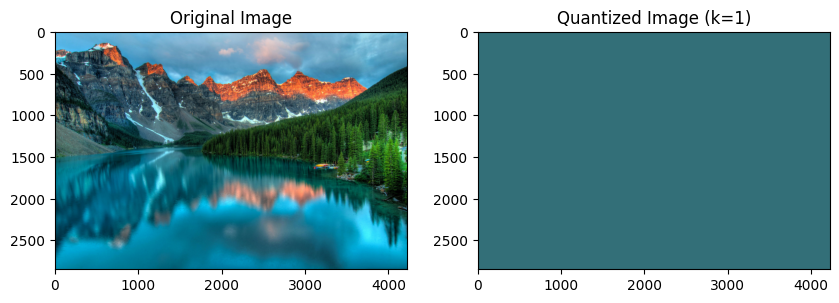

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quantization with k=2: MSE = 1674.1878196230302


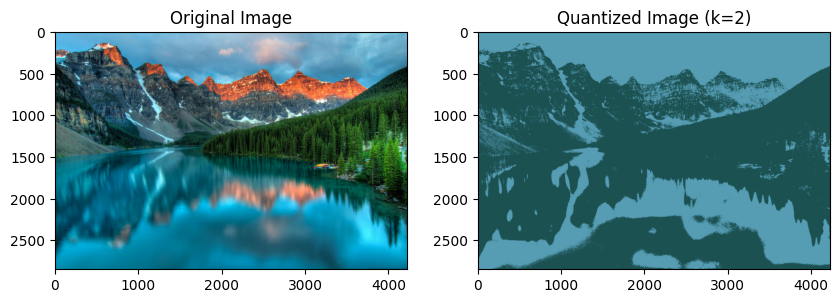

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quantization with k=4: MSE = 801.3135580758577


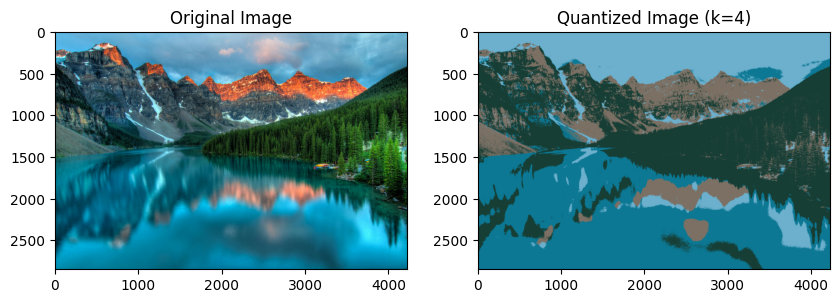

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quantization with k=8: MSE = 379.187996385177


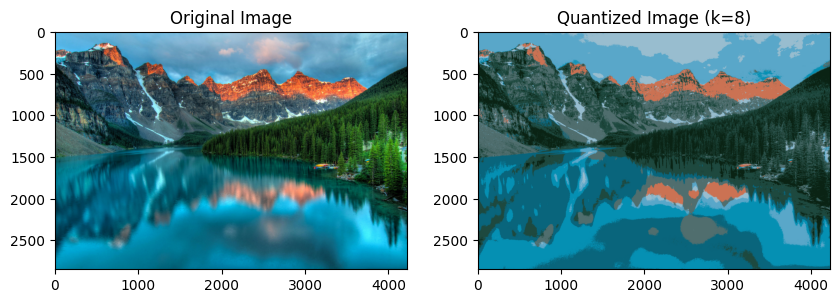

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quantization with k=16: MSE = 192.24259756254088


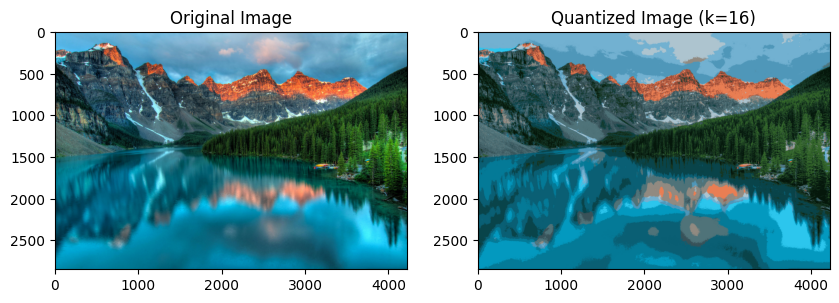

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from skimage import io # For image reading
import matplotlib.pyplot as plt

def read_image(image_path):
    return io.imread(image_path)

def k_means_quantization(image, k):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Apply k-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    new_pixels = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape back to the original image shape
    quantized_image = new_pixels.reshape(image.shape)
    return quantized_image

def calculate_mse(original_image, quantized_image):
    return mean_squared_error(original_image.flatten(), quantized_image.flatten())

def main():
    image_path = '/content/RGB image 3.jpg' # Update this with your image path
    original_image = read_image(image_path)
    ks = [1, 2, 4, 8, 16]

    for k in ks:
        quantized_image = k_means_quantization(original_image, k)
        mse = calculate_mse(original_image, quantized_image)
        print(f"Quantization with k={k}: MSE = {mse}")

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(quantized_image.astype(np.uint8))
        plt.title(f'Quantized Image (k={k})')
        plt.show()

if __name__ == "__main__":
    main()

With increasing value of k, quality of image improves. It's important to note that simply increasing K doesn't guarantee better image quality. The optimal value of K depends on various factors including the nature of the image, the desired level of detail, computational resources, and the specific application of the clustering.

**Q2. Write a code to find the connected components present in an image as shown in the given example. Utilize
any image from the internet of your choice and identify the components present in it, emphasizing accuracy.**

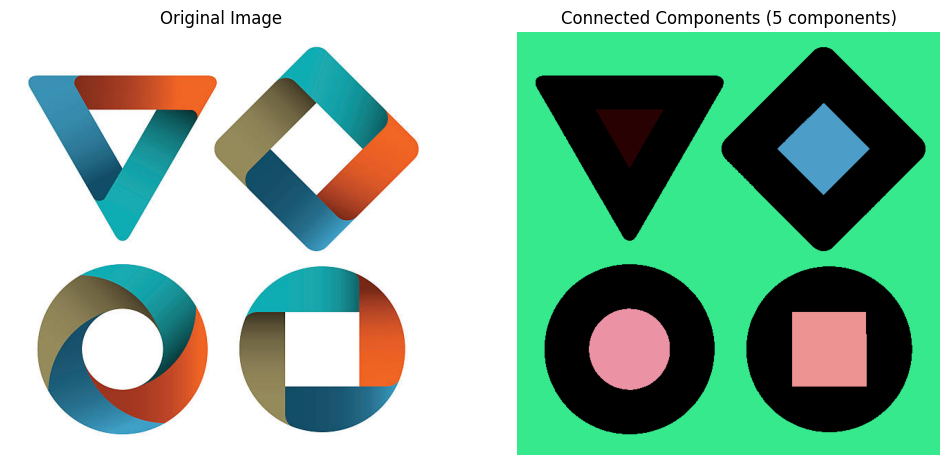

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'q2image3.jpg'  # Replace 'image.jpg' with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to convert it to binary
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Create a random colormap
colormap = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)
colormap[0] = [0, 0, 0]  # Make the background black

# Create a colored image representing connected components
colored_image = colormap[labels]

# Display the original image and the colored image with connected components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
plt.title(f'Connected Components ({num_labels-1} components)')
plt.axis('off')

plt.show()

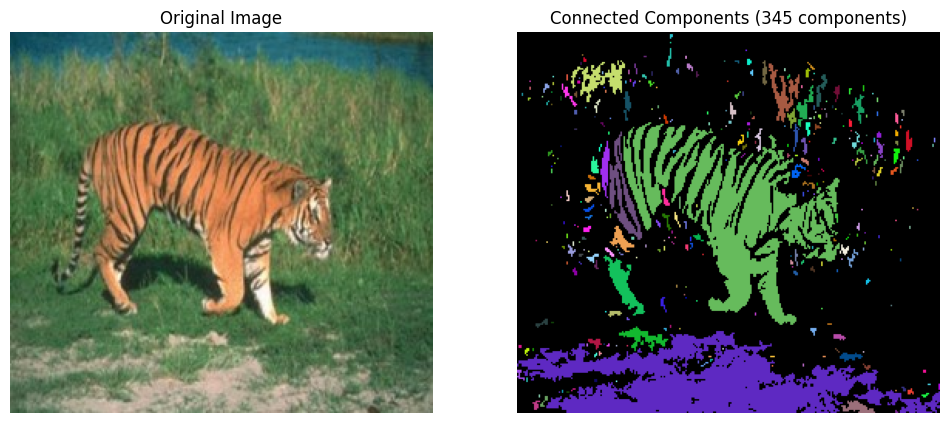

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'q2image2.jpg'  # Replace 'image.jpg' with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to convert it to binary
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Create a random colormap
colormap = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)
colormap[0] = [0, 0, 0]  # Make the background black

# Create a colored image representing connected components
colored_image = colormap[labels]

# Display the original image and the colored image with connected components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
plt.title(f'Connected Components ({num_labels-1} components)')
plt.axis('off')

plt.show()

**Q3. From the attached database of standard test images, select the gray scale ‘lena_gray_512.tif’ image of dimension pixels. Perform the following operations:**

(a) Reduce the image size by down sampling to 256x256, name this image as ‘reduce_lena_256.tif’.

(b) Compare the reduced image ‘reduced_lena_256.tif’ with the given image in the database ‘lena_gray_256.tif’ by finding the PSNR values between them. Also plot the image showing MSE difference for the same.

(c) Now again resize the computed image ‘reduced_lena_256.tif’ to original dimension pixel using these methods:

• Nearest Neighbour Interpolation

• Bilinear Interpolation

• Bicubic Interpolation

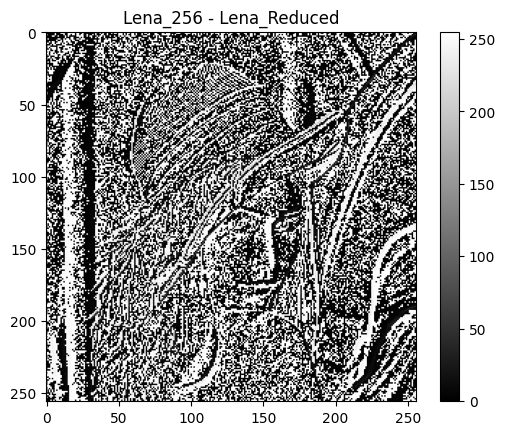

PSNR Difference: 31.06 dB
Mean Square Error Difference: 22.17 dB


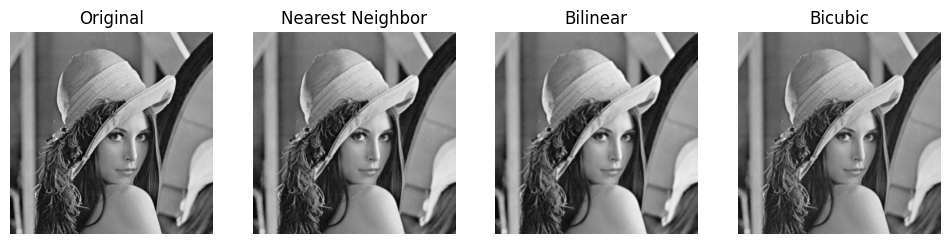

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load Lena 512 Image
lena_original = cv2.imread('lena_gray_512.tif', cv2.IMREAD_GRAYSCALE)
# (a) Down Sampling
lena_reduced = cv2.resize(lena_original, (256, 256))
cv2.imwrite('reduced_lena_256.tif', lena_reduced)
# (b) Load Lena 256 Image & Compare
lena_256 = cv2.imread('lena_gray_256.tif', cv2.IMREAD_GRAYSCALE)
# PSNR Difference
psnr_value = cv2.PSNR(lena_256, lena_reduced)
# Mean Square Error Difference
mse = np.mean((lena_256 - lena_reduced) ** 2)
# Image Produced By Difference
difference_image = np.abs(lena_256 - lena_reduced)
plt.imshow(difference_image, cmap='gray')
plt.title("Lena_256 - Lena_Reduced")
plt.colorbar()
plt.show()
print(f'PSNR Difference: {psnr_value:.2f} dB')
print(f'Mean Square Error Difference: {mse:.2f} dB')
# (c) Resize Using Different Interpolation Methods
original_dimensions = (512, 512)
nearest_neighbor = cv2.resize(lena_reduced, original_dimensions, interpolation=cv2.INTER_NEAREST)
bilinear = cv2.resize(lena_reduced, original_dimensions, interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(lena_reduced, original_dimensions, interpolation=cv2.INTER_CUBIC)
# Display Images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(lena_original, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(nearest_neighbor, cmap='gray')
axes[1].set_title('Nearest Neighbor')
axes[2].imshow(bilinear, cmap='gray')
axes[2].set_title('Bilinear')
axes[3].imshow(bicubic, cmap='gray')
axes[3].set_title('Bicubic')
for ax in axes:
    ax.axis('off')
plt.show()


**Q4. Develop codes in python to obtain the filtered imaged from the noisy image given to you as input ‘Noisy image’ in the database. Show the steps involved to be applied for filtering and explain why?**

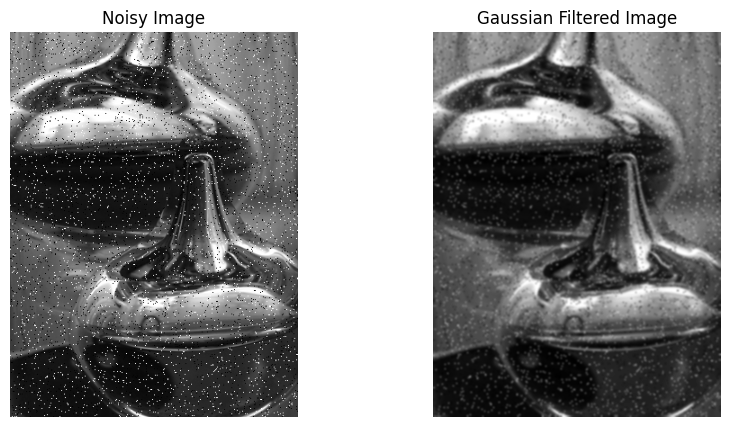

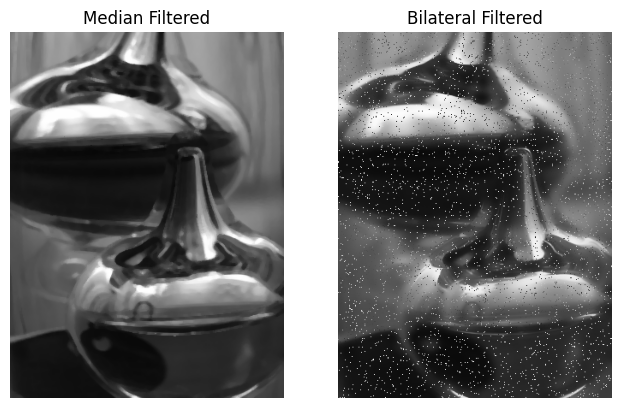

PSNR Difference (Gaussian Filtered): 18.63 db
PSNR Difference (Median Filtered): 17.56 db
PSNR Difference (Bilateral Filtered): 24.04 db


In [21]:
import cv2
import matplotlib.pyplot as plt

# Load the noisy image (assuming it's a color image)
noisy_image = cv2.imread('Noisy image.png')

# Convert color image to grayscale
noisy_image_gray = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

# Convert image to uint8 (if needed)
noisy_image_uint8 = cv2.convertScaleAbs(noisy_image_gray)

# Apply Gaussian blur and other filters
gaussian_filtered = cv2.GaussianBlur(noisy_image_uint8, (5, 5), 0)
median_filtered = cv2.medianBlur(noisy_image, 5)
bilateral_filtered = cv2.bilateralFilter(noisy_image, 15, 175, 175)
# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image_gray, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filtered')
plt.axis('off')

plt.show()

# PSNR Difference Analysis
psnr_value_gaussian = cv2.PSNR(noisy_image_uint8, gaussian_filtered)
psnr_value_median = cv2.PSNR(noisy_image, median_filtered)
psnr_value_bilateral = cv2.PSNR(noisy_image, bilateral_filtered)
print(f"PSNR Difference (Gaussian Filtered): {psnr_value_gaussian:.2f} db")
print(f"PSNR Difference (Median Filtered): {psnr_value_median:.2f} db")
print(f"PSNR Difference (Bilateral Filtered): {psnr_value_bilateral:.2f} db")

Filtering a noisy image involves applying various techniques to reduce or remove the noise while preserving the important features of the image. Here are the steps for filtering a noisy image:

**Understand the Noise**: Different types of noise require different filtering techniques. Common types of noise include Gaussian noise, salt and pepper noise, and speckle noise. Understanding the type of noise present in the image will help in selecting an appropriate filtering method.

Visualize the Noisy Image: Before applying any filtering technique, it's essential to visualize the noisy image to understand the extent of noise present and its impact on the image quality.

**Select a Filtering Method:**

**Median Filter**: Replaces each pixel value with the median value of its neighboring pixels. Effective for salt and pepper noise.
**Gaussian Filter**: Uses a Gaussian kernel to blur the image, effectively reducing high-frequency noise.
**Bilateral Filter**: Preserves edges while reducing noise by considering both spatial and intensity differences.
**Determine Filter Parameters**: Depending on the chosen filtering method, determine any parameters required, such as the size of the filter kernel or the standard deviation of the Gaussian filter.

**Apply the Filter**: Use the selected filtering method to filter the noisy image. This involves convolving the image with the filter kernel.

**Evaluate the Result**: Visualize the filtered image and assess whether the noise has been adequately reduced while preserving important image features. It's essential to strike a balance between noise reduction and preservation of image details.

**Iterative Refinement**: If the filtering results are unsatisfactory, consider iteratively refining the filtering process by adjusting parameters or trying different filtering techniques.

**Performance Considerations**: Keep in mind the computational cost associated with different filtering methods, especially when dealing with large images or real-time applications. Choose a filtering method that strikes a balance between effectiveness and computational efficiency.

**Post-Processing**: Depending on the application, additional post-processing steps such as contrast enhancement or sharpening may be necessary to further improve the visual quality of the filtered image.

**Documentation and Analysis**: Document the filtering steps and analyze the effectiveness of the chosen filtering method by comparing the noisy and filtered images, as well as considering any quantitative metrics such as peak signal-to-noise ratio (PSNR) or mean squared error (MSE).

**Q5. Take any one image from the given database and compute:**

• First order derivative along ‘x’

• First order derivative along ‘y’

• Gradient image magnitude and followed by thresholding to output edge map.

• Edge map computed using second order derivative

• Edge map using LoG and Canny edge detector

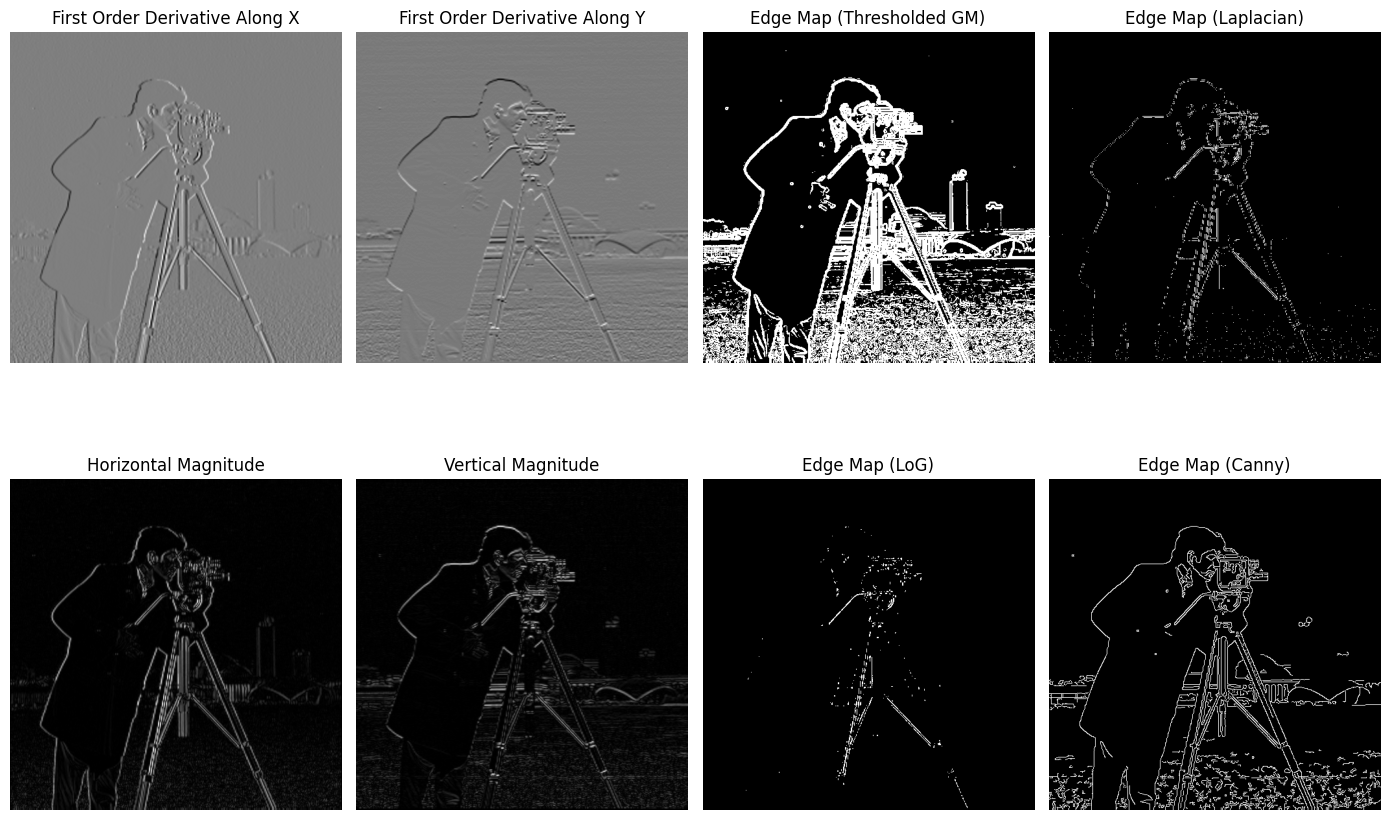

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
cameraman = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)
# First Order Derivative Along 'X'
sobel_x = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=3)
# First Order Derivative Along 'Y'
sobel_y = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=3)
# Gradient Image Magnitude & Thresholding To Output Edge Map
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
edge_map_thresholded = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)[1]
# Horizontal and Vertical Magnitude
horizontal_magnitude = np.abs(sobel_x)
vertical_magnitude = np.abs(sobel_y)
# Edge Map (Laplacian Second Order Derivative)
laplacian = cv2.Laplacian(cameraman, cv2.CV_64F)
laplacian_edge_map = cv2.threshold(np.abs(laplacian), 50, 255, cv2.THRESH_BINARY)[1]
# Edge Map using LoG & Canny Edge Detector
log = cv2.Laplacian(cv2.GaussianBlur(cameraman, (5, 5), 0), cv2.CV_64F)
log_edge_map = cv2.threshold(np.abs(log), 30, 255, cv2.THRESH_BINARY)[1]
canny_edge_map = cv2.Canny(cameraman, 100, 200)
# Displaying Images
plt.figure(figsize=(14, 10))
plt.subplot(2, 4, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('First Order Derivative Along X')
plt.axis('off')
plt.subplot(2, 4, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('First Order Derivative Along Y')
plt.axis('off')
plt.subplot(2, 4, 3)
plt.imshow(edge_map_thresholded, cmap='gray')
plt.title('Edge Map (Thresholded GM)')
plt.axis('off')
plt.subplot(2, 4, 4)
plt.imshow(laplacian_edge_map, cmap='gray')
plt.title('Edge Map (Laplacian)')
plt.axis('off')
plt.subplot(2, 4, 5)
plt.imshow(horizontal_magnitude, cmap='gray')
plt.title('Horizontal Magnitude')
plt.axis('off')
plt.subplot(2, 4, 6)
plt.imshow(vertical_magnitude, cmap='gray')
plt.title('Vertical Magnitude')
plt.axis('off')
plt.subplot(2, 4, 7)
plt.imshow(log_edge_map, cmap='gray')
plt.title('Edge Map (LoG)')
plt.axis('off')
plt.subplot(2, 4, 8)
plt.imshow(canny_edge_map, cmap='gray')
plt.title('Edge Map (Canny)')
plt.axis('off')
plt.tight_layout()
plt.show()

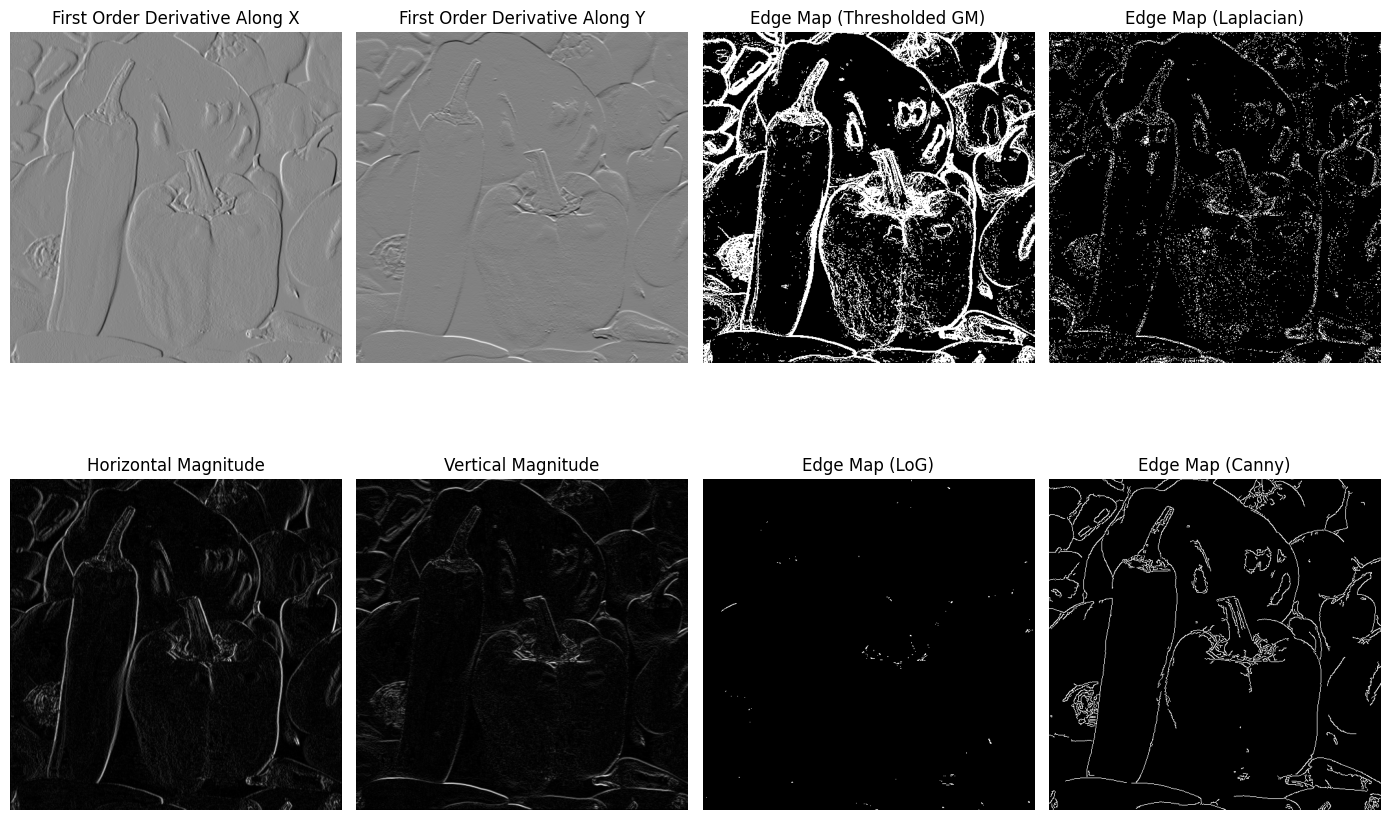

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
lena_image = cv2.imread('peppers_gray.tif', cv2.IMREAD_GRAYSCALE)
# First Order Derivative Along 'X'
sobel_x = cv2.Sobel(lena_image, cv2.CV_64F, 1, 0, ksize=3)
# First Order Derivative Along 'Y'
sobel_y = cv2.Sobel(lena_image, cv2.CV_64F, 0, 1, ksize=3)
# Gradient Image Magnitude & Thresholding To Output Edge Map
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
edge_map_thresholded = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)[1]
# Horizontal and Vertical Magnitude
horizontal_magnitude = np.abs(sobel_x)
vertical_magnitude = np.abs(sobel_y)
# Edge Map (Laplacian Second Order Derivative)
laplacian = cv2.Laplacian(lena_image, cv2.CV_64F)
laplacian_edge_map = cv2.threshold(np.abs(laplacian), 50, 255, cv2.THRESH_BINARY)[1]
# Edge Map using LoG & Canny Edge Detector
log = cv2.Laplacian(cv2.GaussianBlur(lena_image, (5, 5), 0), cv2.CV_64F)
log_edge_map = cv2.threshold(np.abs(log), 30, 255, cv2.THRESH_BINARY)[1]
canny_edge_map = cv2.Canny(lena_image, 100, 200)
# Displaying Images
plt.figure(figsize=(14, 10))
plt.subplot(2, 4, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('First Order Derivative Along X')
plt.axis('off')
plt.subplot(2, 4, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('First Order Derivative Along Y')
plt.axis('off')
plt.subplot(2, 4, 3)
plt.imshow(edge_map_thresholded, cmap='gray')
plt.title('Edge Map (Thresholded GM)')
plt.axis('off')
plt.subplot(2, 4, 4)
plt.imshow(laplacian_edge_map, cmap='gray')
plt.title('Edge Map (Laplacian)')
plt.axis('off')
plt.subplot(2, 4, 5)
plt.imshow(horizontal_magnitude, cmap='gray')
plt.title('Horizontal Magnitude')
plt.axis('off')
plt.subplot(2, 4, 6)
plt.imshow(vertical_magnitude, cmap='gray')
plt.title('Vertical Magnitude')
plt.axis('off')
plt.subplot(2, 4, 7)
plt.imshow(log_edge_map, cmap='gray')
plt.title('Edge Map (LoG)')
plt.axis('off')
plt.subplot(2, 4, 8)
plt.imshow(canny_edge_map, cmap='gray')
plt.title('Edge Map (Canny)')
plt.axis('off')
plt.tight_layout()
plt.show()